BL.EN.U4CSE21176 ; S NAVIN SUNDER ; CSE-C

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #to build Decision Tree Classifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder   #to encode all the categorical and numerical values
from sklearn import tree
import matplotlib.pyplot as plt #to visualize the tree
from sklearn.model_selection import train_test_split #to split the data into training and testing data
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report  #to build a classification report

A1. For the data table provided below, calculate the entropy associated with each attribute / feature at the root node. Using this information, identify the first feature that you’d select for constructing the decision tree. Use Information Gain as the impurity measure to identify the root node.‘buys_computer’ is the class label.

In [11]:
data1 = pd.read_excel(r"C:\Amrita cse\5th Semester\Machine Learning\Lab\Lab 4\lab4_data.xlsx")
df = pd.DataFrame(data1)
df

,age,income,student,credit_rating,buys_compter
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31..40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [14]:
#CALCULATING ENTROPY OF EACH FEATURE
def calculate_entropy(data):
    # Count the occurrences of each class
    classCounts = data['buys_compter'].value_counts()
    # Calculate the entropy
    entropy = 0
    total_samples = len(data)
    for count in classCounts:
        probability = count / total_samples
        entropy = entropy - probability * np.log2(probability)
    return entropy

def calculate_root_entropy(data, features):
    root_entropy = calculate_entropy(data)
    feature_entropies = {}
    for feature in features:
        unique_values = data[feature].unique()
        feature_entropy = 0
        for value in unique_values:
            subset = data[data[feature] == value]
            feature_entropy += (len(subset) / len(data)) * calculate_entropy(subset)
        feature_entropies[feature] = feature_entropy
        
    return root_entropy, feature_entropies
# Specify the list of features (attributes)
features = ['age', 'income', 'student','credit_rating','buys_compter']
# Calculate root entropy and entropies for each feature
root_entropy, feature_entropies = calculate_root_entropy(df, features)
# Print the results
print(f"Root Entropy: {root_entropy}")
for feature, entropy in feature_entropies.items():
    print(f"Entropy for {feature}: {entropy}")

Root Entropy: 0.9402859586706311
Entropy for age: 0.6935361388961918
Entropy for income: 0.9110633930116763
Entropy for student: 0.7884504573082896
Entropy for credit_rating: 0.8921589282623617
Entropy for buys_compter: 0.0


In [15]:
import numpy as np
import pandas as pd

# Function to calculate entropy
def calculate_entropy(data):
    class_counts = data['buys_compter'].value_counts()
    entropy = 0
    total_samples = len(data)
    for count in class_counts:
        probability = count / total_samples
        entropy -= probability * np.log2(probability)
    return entropy

# Function to calculate information gain
def calculate_information_gain(root_entropy, feature_entropy):
    information_gain = root_entropy - feature_entropy
    return information_gain

df = pd.DataFrame(data1)

# Calculate root entropy
root_entropy = calculate_entropy(df)

# Calculate feature entropies
features = ['age', 'income', 'student', 'credit_rating']
information_gains = {}

for feature in features:
    unique_values = df[feature].unique()
    feature_entropy = 0
    for value in unique_values:
        subset = df[df[feature] == value]
        feature_entropy += (len(subset) / len(df)) * calculate_entropy(subset)
    feature_entropies[feature] = feature_entropy
    information_gains[feature] = calculate_information_gain(root_entropy, feature_entropy)

# Calculate information gain for each feature
information_gains = {feature: calculate_information_gain(root_entropy, entropy) for feature, entropy in feature_entropies.items()}

# Print the information gains
for feature, gain in information_gains.items():
    print(f"Information Gain for {feature}: {gain:.4f}")

# Select the feature with the highest information gain as the root node
root_node = max(information_gains, key=information_gains.get)

print(f"The root node is: {root_node} with information gain {information_gains[root_node]:.4f}")


Information Gain for age: 0.2467
Information Gain for income: 0.0292
Information Gain for student: 0.1518
Information Gain for credit_rating: 0.0481
Information Gain for buys_compter: 0.9403
The root node is: buys_compter with information gain 0.9403


A2. Create a Decision Tree for the above data. Get the depth of the constructed tree

In [16]:
#splitting the data into features and target variables
#splitting the dataset into features is known as independent variables
#target variables is known as variable or label 
#this is typically used to model training and model evaluation that helps in the predictions of the model
X = df.drop('buys_compter',axis=1) #axis=1 is to access the columns of the dataset
y = df['buys_compter']

xEncoded = pd.get_dummies(X,columns=['age', 'income', 'student', 'credit_rating']) #pd.get_dummies is used to do one-hot encoding in python
#here one-hot encoding is performed to convert the categorical values into binary values

#splitting of code into train and set using train_test_split
X_train,X_test,y_train,y_test = train_test_split(xEncoded,y,test_size=0.2)

#creating and fitting the decsion tree classifier. Using the training values to make the decision tree
model = DecisionTreeClassifier()
model.fit(X_train,y_train)


RequiredAccuracyTrain = model.score(X_train,y_train)
print("The accuracy of train model is: ",RequiredAccuracyTrain * 100,"%" )

RequiredAccuracyTest = model.score(X_test,y_test)
print("The accuracy of test model is: ",RequiredAccuracyTest * 100,"%" )

print("The depth of the tree is: ",model.get_depth())

The accuracy of train model is:  100.0 %
The accuracy of test model is:  33.33333333333333 %
The depth of the tree is:  5


A3. Visualize the constructed tree with plot_tree() command.

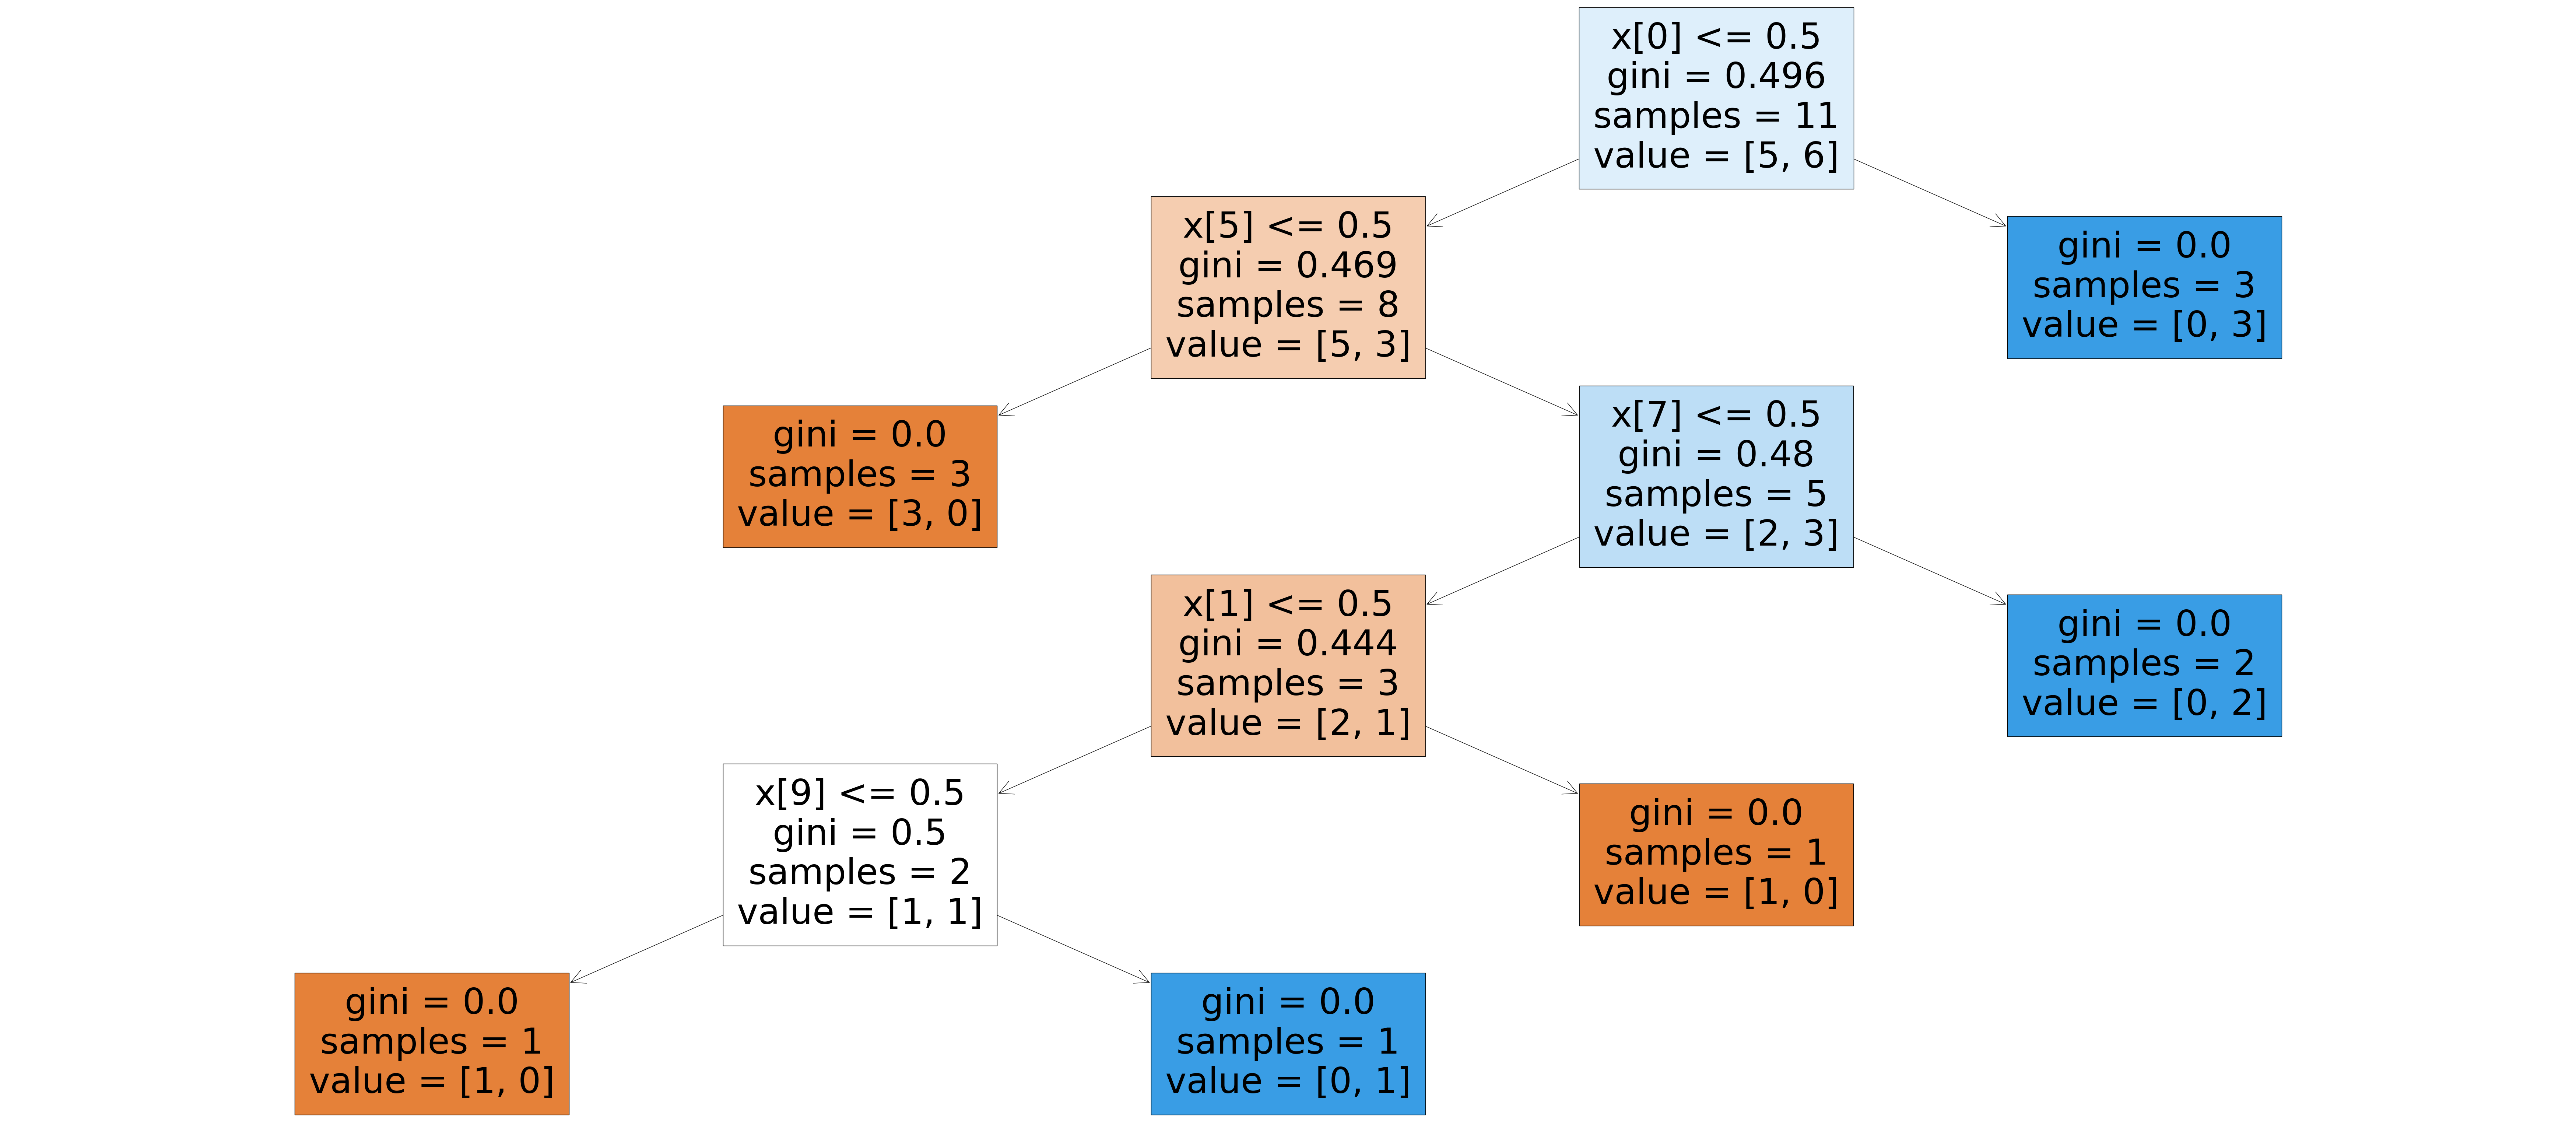

In [17]:
plt.figure(figsize=(90,40))
plot_tree(model,filled=True)
plt.show()

A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code forhelp

In [18]:
RequiredAccuracyTest = model.score(X_test,y_test)
print("The accuracy of the model is: ",RequiredAccuracyTest * 100,"%" )

RequiredAccuracyTrain = model.score(X_train,y_train)
print("The accuracy of the model is: ",RequiredAccuracyTrain * 100,"%" )

The accuracy of the model is:  33.33333333333333 %
The accuracy of the model is:  100.0 %


A5. Impose a max_depth constraint on the tree construction.Construct the tree again and check the accuracies. Visualize the tree constructed with max_depth constraint.

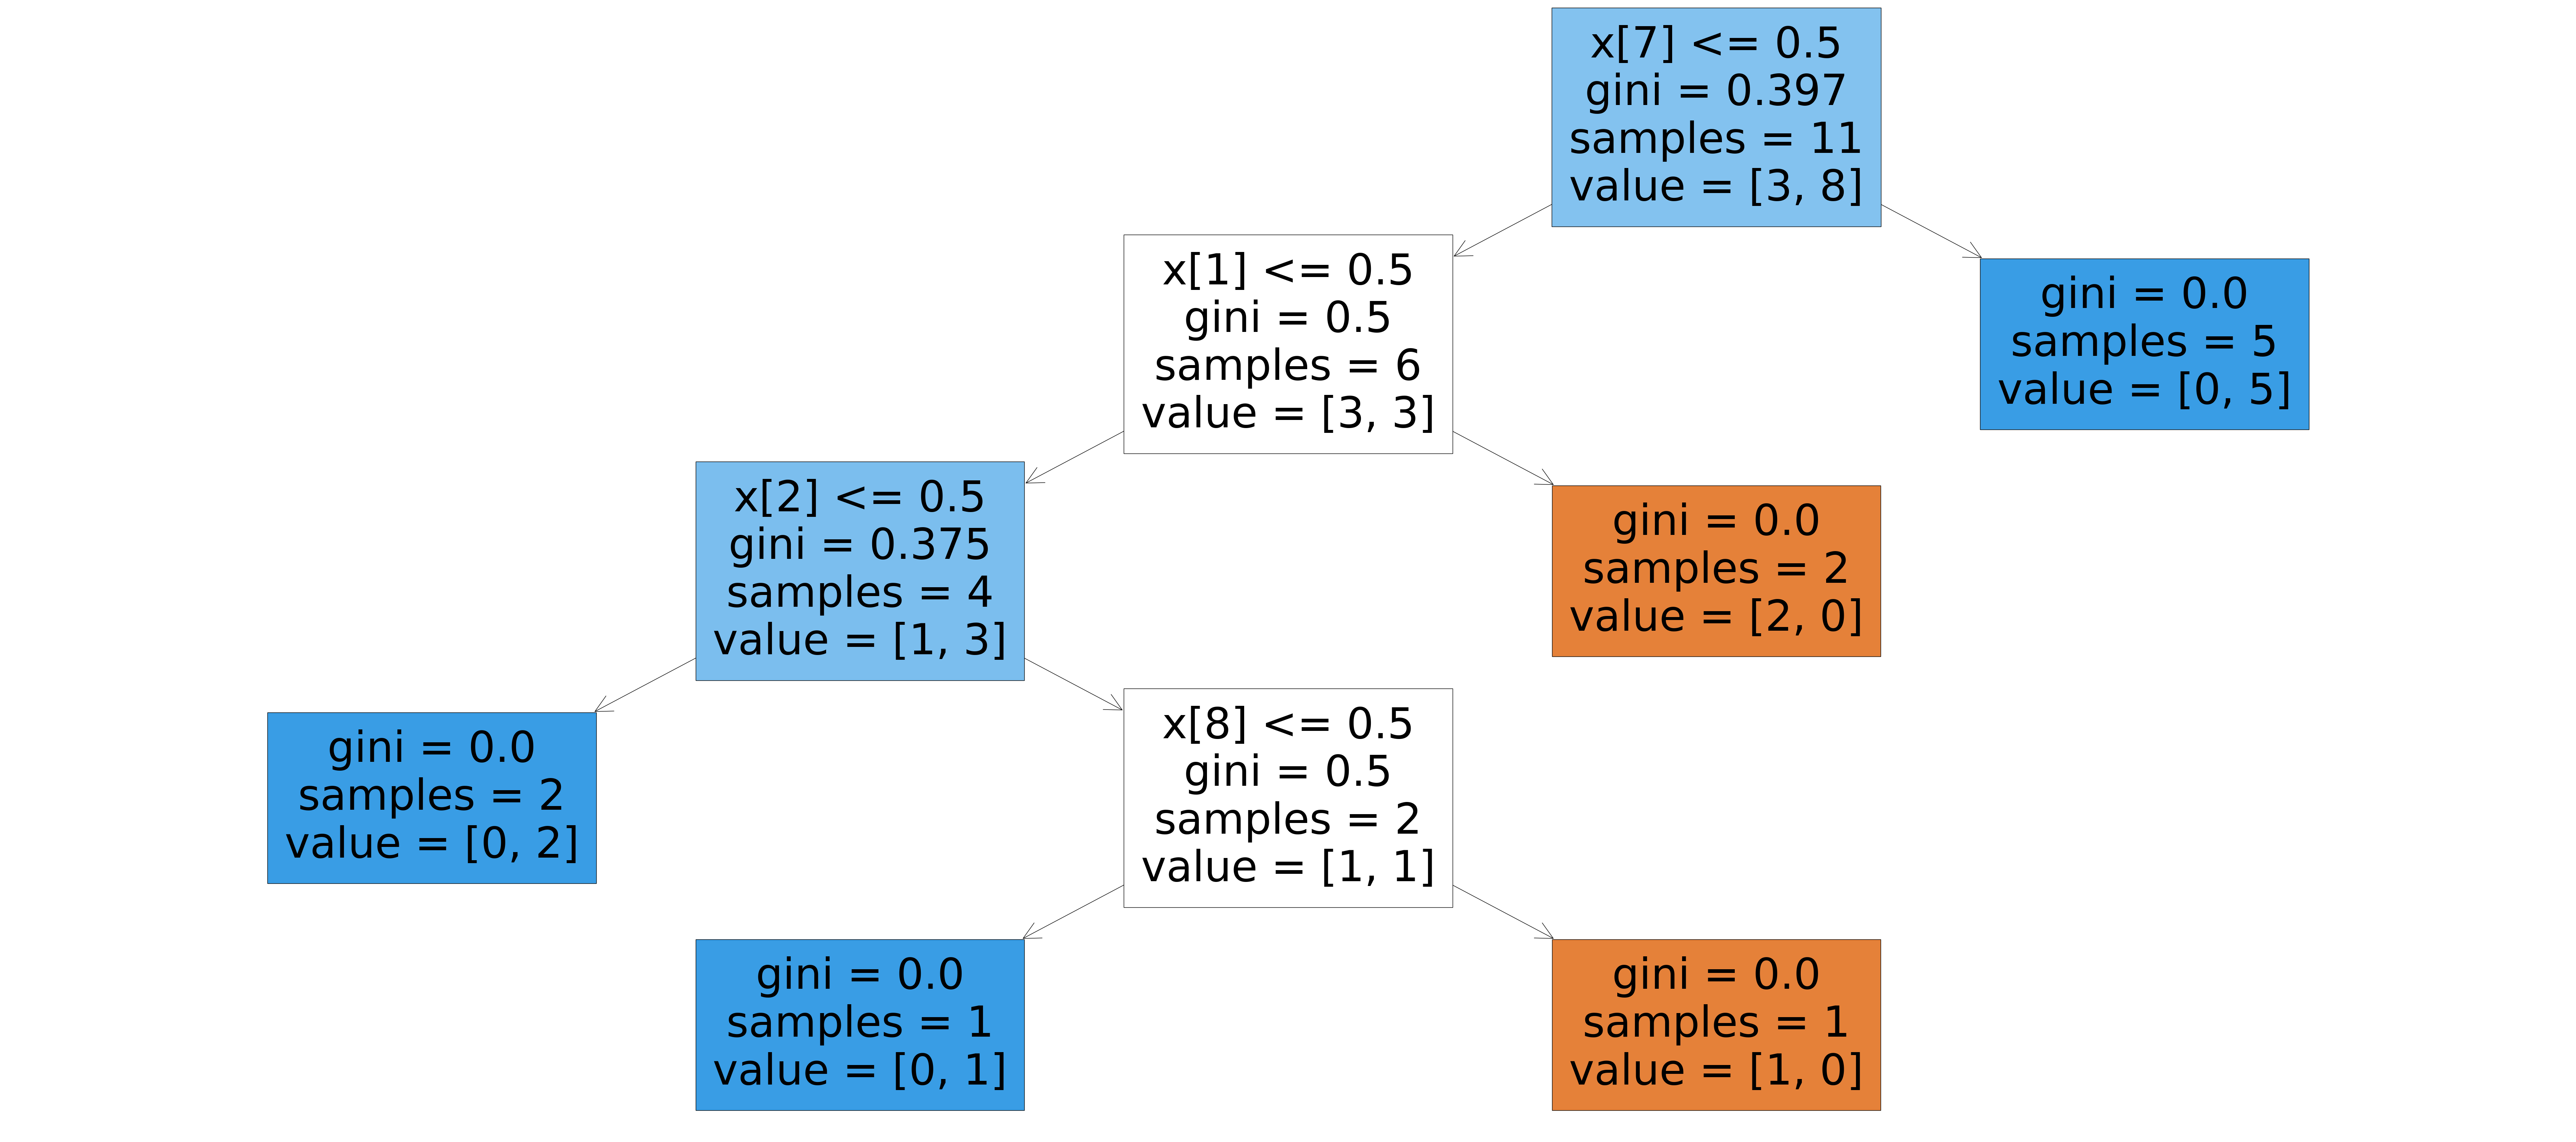

In [20]:
X = df.drop('buys_compter',axis=1) #axis=1 is to access the columns of the dataset
y = df['buys_compter']

xEncoded = pd.get_dummies(X,columns=['age', 'income', 'student', 'credit_rating']) #pd.get_dummies is used to do one-hot encoding in python
#here one-hot encoding is performed to convert the categorical values into binary values

#splitting of code into train and set using train_test_split
X_train,X_test,y_train,y_test = train_test_split(xEncoded,y,test_size=0.2)

#creating and fitting the decsion tree classifier. Using the training values to make the decision tree
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)

plt.figure(figsize=(90,40))
plot_tree(model,filled=True)
plt.show()


A6. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study the model & graph. Find the differences between the default criterion and entropy criterion. Refer code below for criterion.

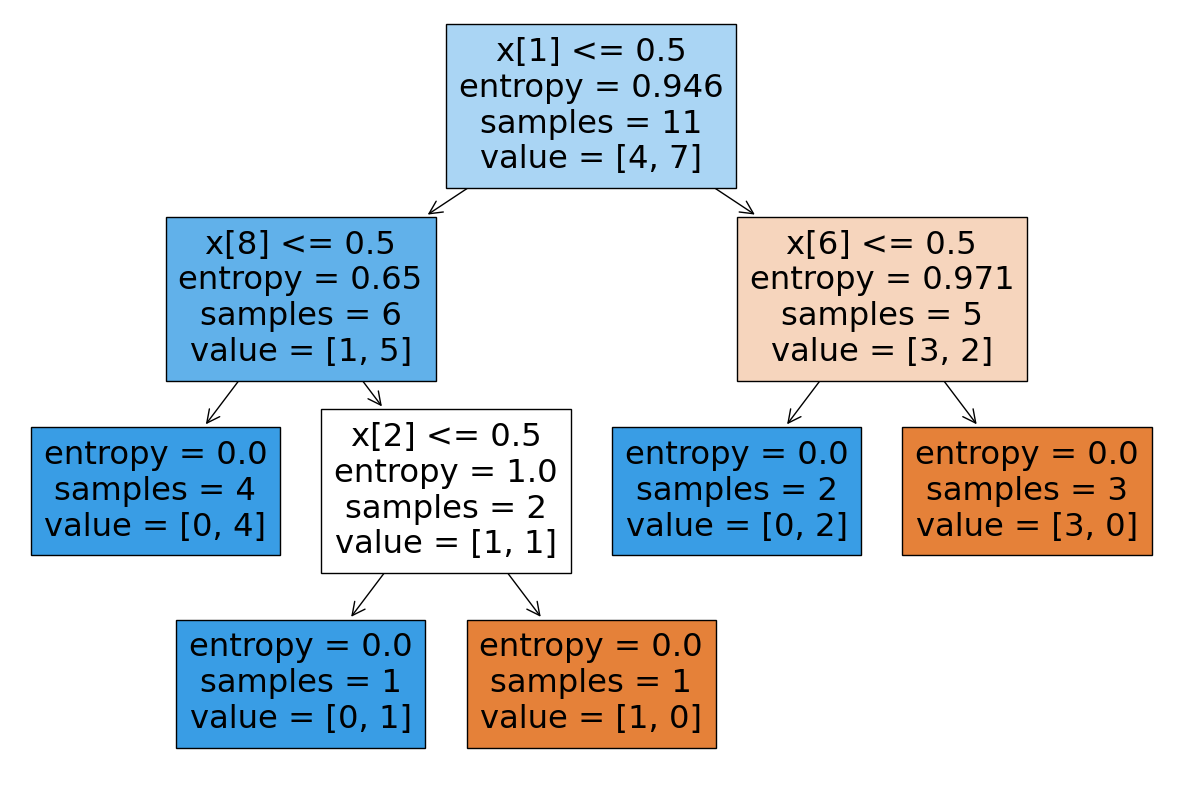

In [22]:
X = df.drop('buys_compter', axis=1)
y = df['buys_compter']

xEncoded = pd.get_dummies(X, columns=['age', 'income', 'student', 'credit_rating'])

X_train, X_test, y_train, y_test = train_test_split(xEncoded, y, test_size=0.2)

# Creating and fitting the decision tree classifier.
model = DecisionTreeClassifier(criterion='entropy')  # Note the use of 'entropy' as a string
model.fit(X_train, y_train)

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(model, filled=True)
plt.show()




A7. Construct a random forest classifier on your project data. Find the differences between the decision tree & random forest classifiers with the help of the performance metrics. 

In [3]:
data = pd.read_excel(r"C:\Amrita cse\5th Semester\Machine Learning\Project\embeddingsdata.xlsx")
df = pd.DataFrame(data)
df

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767,Label
0,0.009625,-0.029216,0.027109,0.023631,-0.004972,0.031757,-0.045125,0.044483,0.019400,-0.017189,...,-0.001972,-0.008154,-0.056139,0.009890,0.042366,0.040134,0.009304,-0.016137,-0.009309,0
1,-0.007535,-0.039844,0.030167,0.031224,0.004742,0.028289,-0.068723,0.039153,0.019596,-0.027138,...,0.008613,-0.006578,-0.034220,0.027574,0.045456,0.027402,0.017837,-0.035009,-0.010062,0
2,0.022408,-0.030840,0.032328,0.046965,0.007798,0.025860,-0.065093,0.035118,0.035359,-0.029205,...,0.020413,-0.034288,-0.050649,0.028408,0.040412,0.030261,0.003535,-0.034122,-0.017289,0
3,0.019677,-0.034055,0.012662,0.070387,-0.011170,0.017842,-0.050945,0.044878,0.034781,-0.025772,...,0.002963,-0.018754,-0.053278,0.033005,0.031635,0.022544,-0.011774,-0.011125,-0.017540,0
4,0.017678,-0.030323,0.012829,0.065267,-0.025161,0.011964,-0.050590,0.042820,0.029161,-0.015004,...,0.010192,-0.010147,-0.035857,0.021784,0.034621,0.017342,-0.009884,-0.010316,-0.029238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.019743,-0.071799,0.022546,0.049042,-0.005767,-0.016275,-0.037731,0.029718,0.009203,-0.030913,...,-0.001192,-0.026138,-0.056447,0.015818,0.045241,0.012620,-0.004837,-0.014540,-0.046791,2
896,0.000186,-0.027604,0.010623,0.038237,-0.026675,0.020215,-0.040816,0.032210,0.041016,-0.014836,...,0.015479,-0.003967,-0.037808,0.021234,0.031012,-0.010890,0.003081,-0.015145,-0.045444,0
897,0.018066,-0.032152,0.039794,0.047608,0.003898,0.024092,-0.056508,0.020527,0.031972,-0.026038,...,0.011308,-0.016882,-0.059904,0.009558,0.039976,0.029574,0.013737,-0.003724,-0.017324,2
898,-0.003492,-0.022739,0.021777,0.044054,-0.005621,0.013863,-0.079196,0.039150,0.004557,-0.015787,...,0.004005,-0.007196,-0.041652,0.020945,0.047604,0.019767,0.005806,-0.019280,-0.016415,5


Random Forest Classifier => 


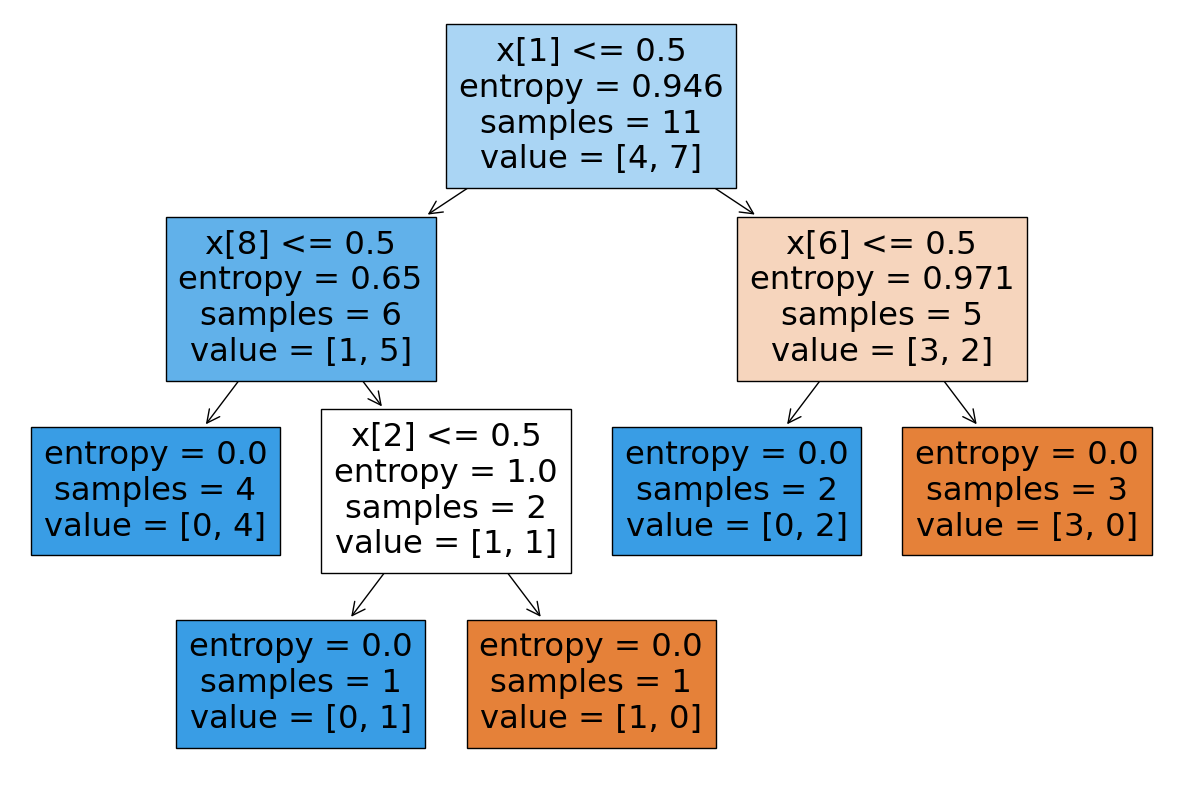

The accuracy of the model is:  61.66666666666667 %
The accuracy of the model is:  99.72222222222223 %
The depth of the tree is:  3


In [24]:
print("Random Forest Classifier => ")
X = data.iloc[:, :-1]  # Assuming the last column is the target variable
y = data.iloc[:, -1]   # Assuming the last column is the target variable
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.2,random_state=42)

modelProjRfc = RandomForestClassifier()
modelProjRfc.fit(X_Train,y_Train)
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(model, filled=True)
plt.show()
RequiredAccuracyTest = modelProjRfc.score(X_Test,y_Test)
print("The accuracy of the model is: ",RequiredAccuracyTest * 100,"%" )

RequiredAccuracyTrain = modelProjRfc.score(X_Train,y_Train)
print("The accuracy of the model is: ",RequiredAccuracyTrain * 100,"%" )

print("The depth of the tree is: ",model.get_depth())

Decision Tree Classifier based on the project dataset

Decision Tree Classifier =>


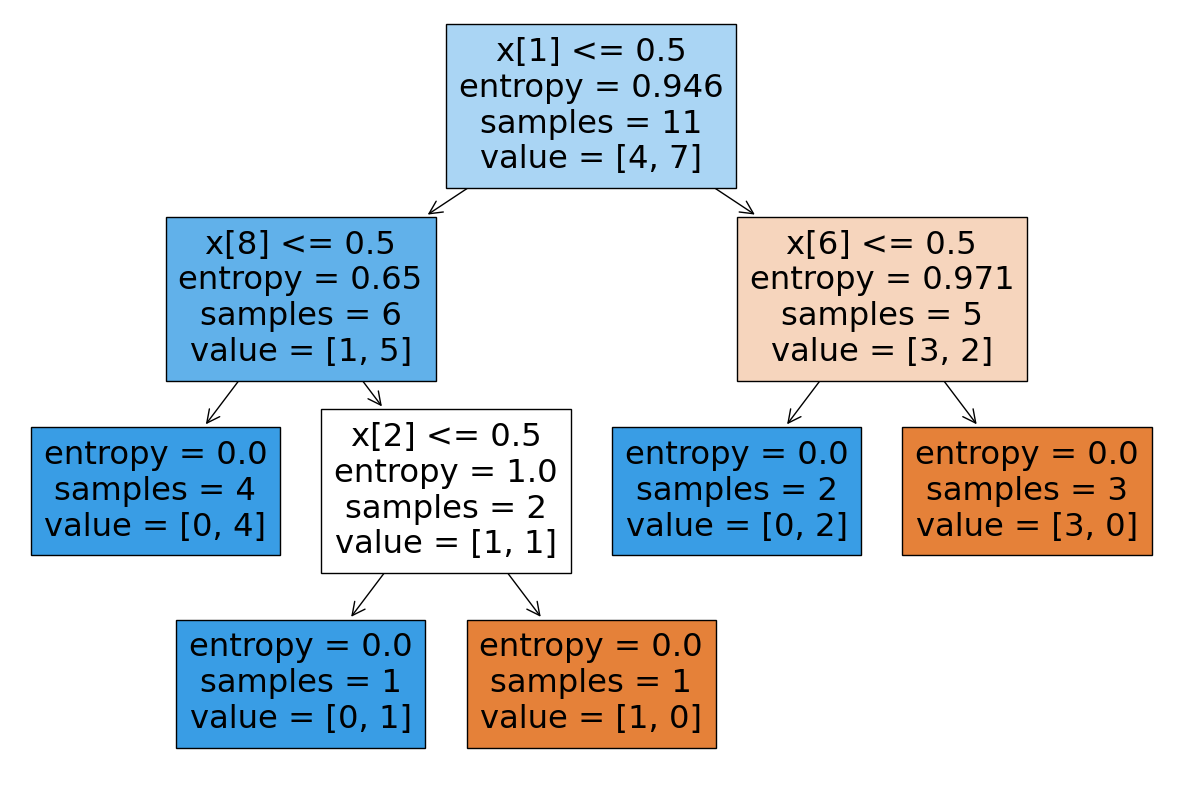

The accuracy of the model is:  43.333333333333336 %
The accuracy of the model is:  99.72222222222223 %
The depth of the tree is:  3


In [27]:
print("Decision Tree Classifier =>")
X = data.iloc[:, :-1]  # Assuming the last column is the target variable
y = data.iloc[:, -1]   # Assuming the last column is the target variable
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.2,random_state=42)

modelProjDfc = DecisionTreeClassifier()
modelProjDfc.fit(X_Train,y_Train)
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(model, filled=True)
plt.show()
RequiredAccuracyTest = modelProjDfc.score(X_Test,y_Test)
print("The accuracy of the model is: ",RequiredAccuracyTest * 100,"%" )

RequiredAccuracyTrain = modelProjDfc.score(X_Train,y_Train)
print("The accuracy of the model is: ",RequiredAccuracyTrain * 100,"%" )
print("The depth of the tree is: ",model.get_depth())

Decision Tree Classification using Entropy as the criteria

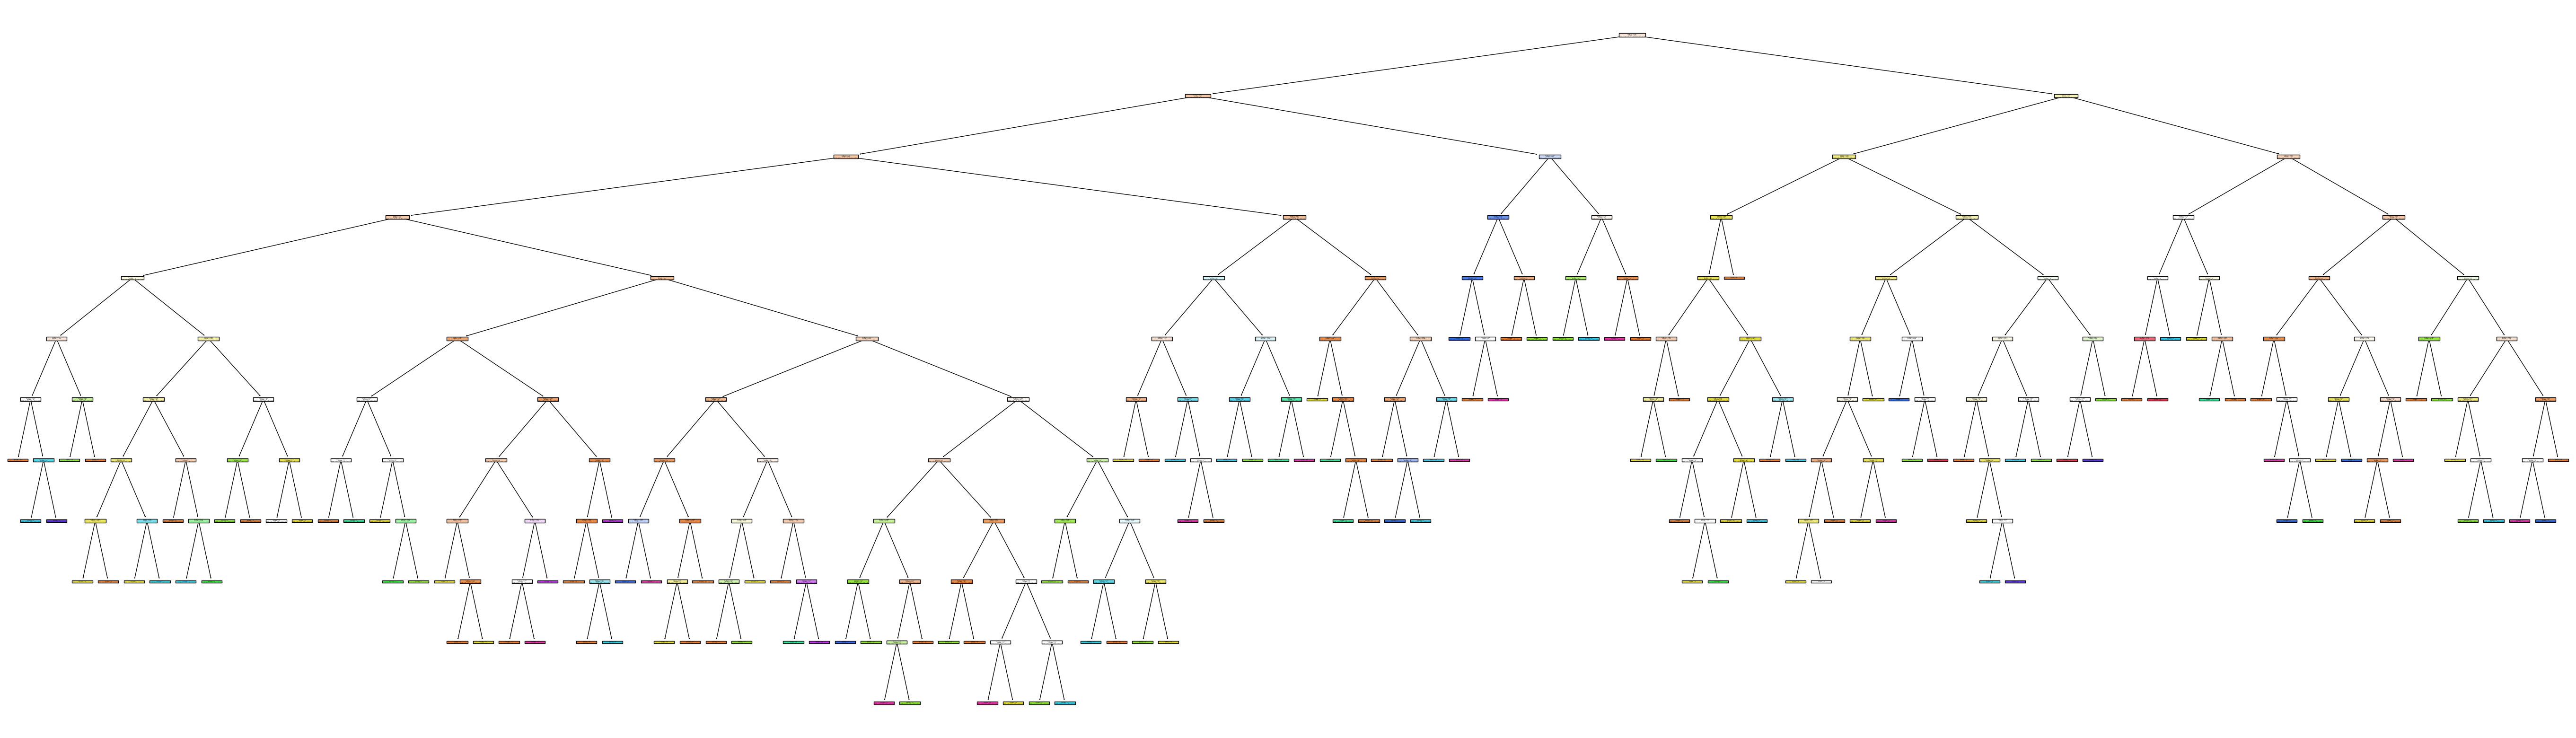

The accuracy of the model is:  42.22222222222222 %
The accuracy of the model is:  99.72222222222223 %
The depth of the tree is:  11


In [52]:
# Creating and fitting the decision tree classifier.
modelProjDfc = DecisionTreeClassifier(criterion='entropy')  # Note the use of 'entropy' as a string
modelProjDfc.fit(X_Train, y_Train)

plt.figure(figsize=(70, 20))  # Adjust the figure size as needed
plot_tree(model, filled=True)
plt.show()
RequiredAccuracyTest = modelProjDfc.score(X_Test,y_Test)
print("The accuracy of the model is: ",RequiredAccuracyTest * 100,"%" )

RequiredAccuracyTrain = modelProjDfc.score(X_Train,y_Train)
print("The accuracy of the model is: ",RequiredAccuracyTrain * 100,"%" )
print("The depth of the tree is: ",model.get_depth())

Random Forest Classifier 

In [39]:
X = data.iloc[:, :-1]  # Assuming the last column is the target variable
y = data.iloc[:, -1]   # Assuming the last column is the target variable
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.2,random_state=42)

modelProjRfc = RandomForestClassifier()
modelProjRfc.fit(X_Train,y_Train)

yPredict = modelProjRfc.predict(X_Test)

accuracy = modelProjRfc.score(X_Train,y_Train)
print("The accuracy of Training Data: ",accuracy * 100)

accuracy = modelProjRfc.score(X_Test,y_Test)
print("The accuracy of Test Data: ",accuracy * 100)

cm = confusion_matrix(y_Test,yPredict)
print("Confusion Matrix: \n",cm)

cr = classification_report(y_Test,yPredict)
print("Classification Report: \n",cr)

The accuracy of Training Data:  99.72222222222223
The accuracy of Test Data:  60.0
Confusion Matrix: 
 [[64  3  0  0  0  0  1  0  0  0  0]
 [13 39  0  0  0  0  0  0  0  0  0]
 [18  2  2  0  0  0  1  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  2  0  0  0  0  0  0]
 [ 9  3  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  1  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.94      0.67        68
           1       0.78      0.75      0.76        52
           2       1.00      0.09      0.16        23
           3       0.00      0.00      0.00         3
           4       1.00      0.40      0.57         5
           5       0.00      0.00      0.00        12
           6       0.33      0.25      0.29         4
           7       0.00      0.00      0.0

c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier

In [46]:
X = data.iloc[:, :-1]  # Assuming the last column is the target variable
y = data.iloc[:, -1]   # Assuming the last column is the target variable
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.2,random_state=42)

modelProjDtc = DecisionTreeClassifier()
modelProjDtc.fit(X_Train,y_Train)

yPredict = modelProjDtc.predict(X_Test)

accuracy = modelProjDtc.score(X_Train,y_Train)
print("The accuracy of Training Data: ",accuracy * 100)

accuracy = modelProjDtc.score(X_Test,y_Test)
print("The accuracy of Test Data: ",accuracy * 100)

cm = confusion_matrix(y_Test,yPredict)
print("Confusion Matrix: \n",cm)

cr = classification_report(y_Test,yPredict)
print("Classification Report: \n",cr)

The accuracy of Training Data:  99.72222222222223
The accuracy of Test Data:  40.0
Confusion Matrix: 
 [[35 10  1  0  1 11  6  0  2  2  0]
 [18 23  5  0  0  2  2  0  0  1  1]
 [12  0  5  0  0  3  1  1  0  0  1]
 [ 0  1  1  0  0  0  0  0  0  1  0]
 [ 2  0  0  0  2  0  0  0  0  1  0]
 [ 2  5  0  0  0  4  0  0  0  1  0]
 [ 0  0  0  0  1  0  3  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  1  0  1  0  1  0  0  0  0]
 [ 1  0  1  0  0  1  1  0  0  0  0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.51      0.50        68
           1       0.55      0.44      0.49        52
           2       0.36      0.22      0.27        23
           3       0.00      0.00      0.00         3
           4       0.40      0.40      0.40         5
           5       0.19      0.33      0.24        12
           6       0.21      0.75      0.33         4
           7       0.00      0.00      0.0

c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


To check overfit/umderfit condition

In [51]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Assuming data is a pandas DataFrame with features and target variable

# Assuming the last column is the target variable, adjust this if needed
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
modelProjDtc = DecisionTreeClassifier()
modelProjDtc.fit(X_train, y_train)

# Predict on the training and testing sets
yPredict1 = modelProjDtc.predict(X_train)
yPredict2 = modelProjDtc.predict(X_test)

# Calculate F1 scores for training and testing
train_f1_score = f1_score(y_train, yPredict1, average='weighted')  # Use 'weighted' for multiclass
print("Training F1-Score:", train_f1_score)

test_f1_score = f1_score(y_test, yPredict2, average='weighted')  # Use 'weighted' for multiclass
print("Testing F1-Score:", test_f1_score)

threshold = 0.07

if abs(train_f1_score - test_f1_score) < threshold:
    outcome = "Regular Fit"
elif train_f1_score > test_f1_score:
    outcome = "Overfitting"
else:
    outcome = "Underfitting"

# Print the learning outcome
print("Model Learning Outcome:", outcome)


Training F1-Score: 0.9971825475819205
Testing F1-Score: 0.41428448524848066
Model Learning Outcome: Overfitting


To prune a Decision Tree

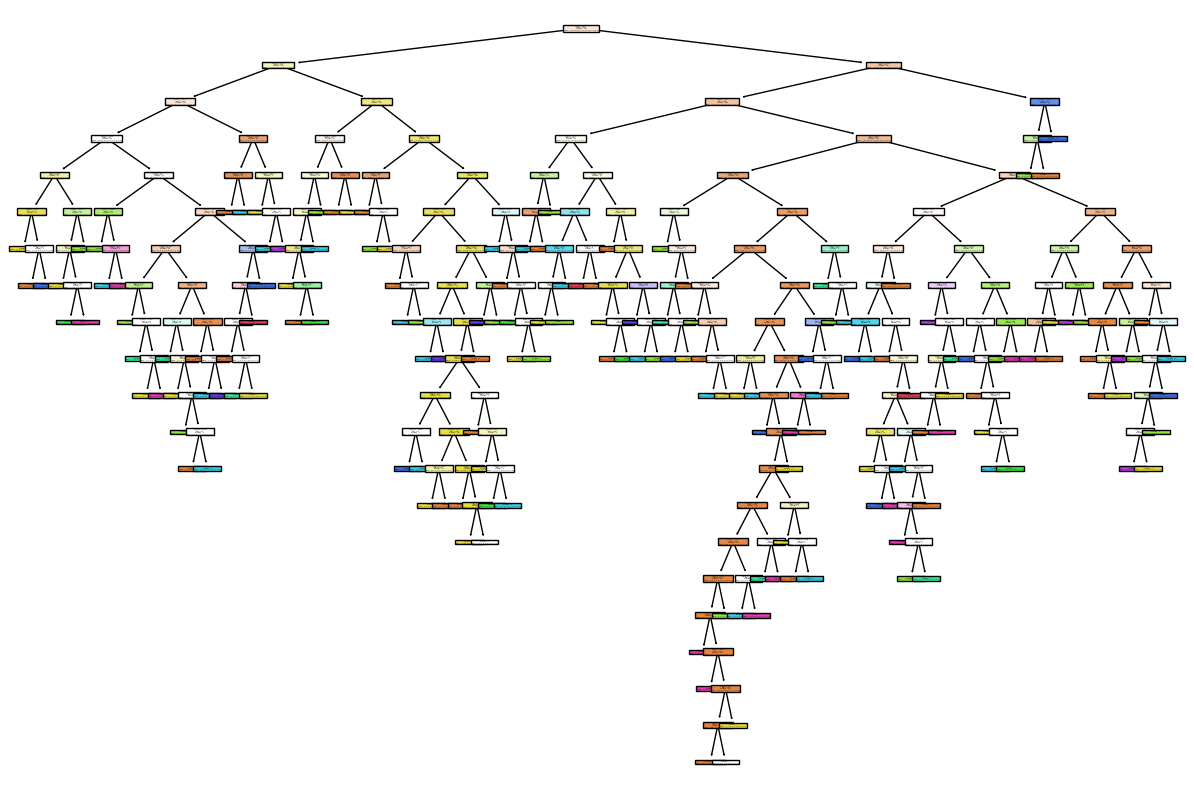

Accuracy of unpruned tree: 0.43333333333333335


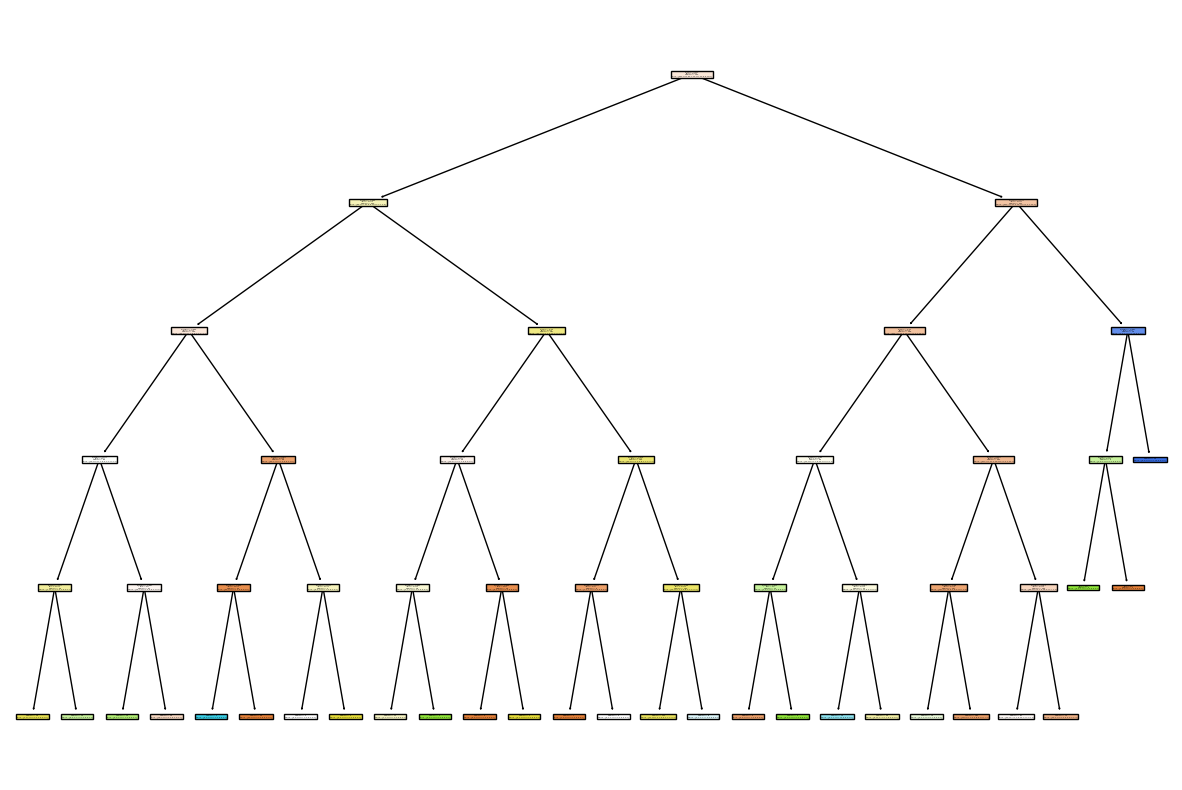

Accuracy of pruned tree: 0.4722222222222222


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier with a high maximum depth (potential for overfitting)
treeclassifier = DecisionTreeClassifier(max_depth=None, random_state=42)

# Fit the unpruned tree to the training data
treeclassifier.fit(X_Train, y_Train)

# Evaluate the unpruned tree on the test data
y_pred = treeclassifier.predict(X_Test)
accuracy_unpruned = accuracy_score(y_Test, y_pred)
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(treeclassifier, filled=True)
plt.show()
print("Accuracy of unpruned tree:", accuracy_unpruned)

# Prune the tree by setting a maximum depth to limit overfitting
prunedTreeClassifier = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the pruned tree to the training data
prunedTreeClassifier.fit(X_Train, y_Train)
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(prunedTreeClassifier, filled=True)
plt.show()

# Evaluate the pruned tree on the test data
y_pred_pruned = prunedTreeClassifier.predict(X_Test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print("Accuracy of pruned tree:", accuracy_pruned)
